In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Step 2: Load dataset 
df = pd.read_csv("Fertilizer Prediction (1).csv") 

In [3]:
df.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.columns

Index(['Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [5]:
df.describe()

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


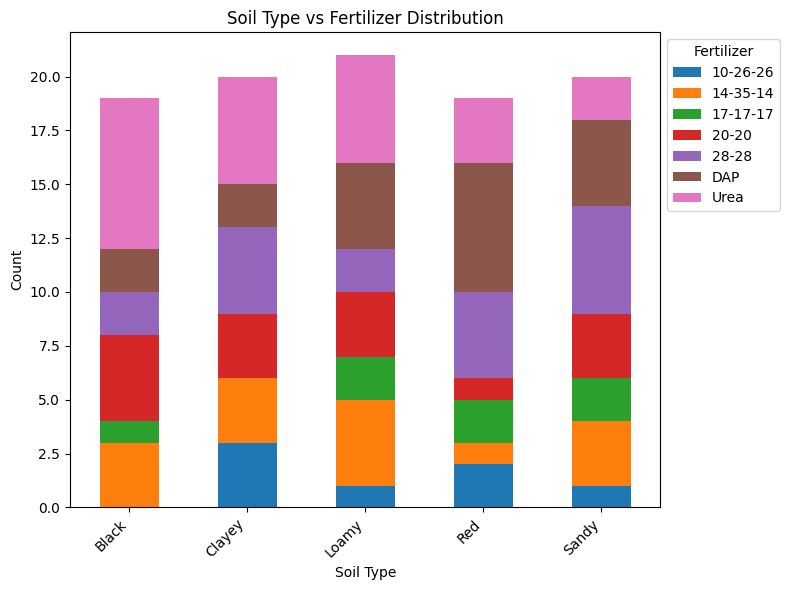

In [6]:
ax = pd.crosstab(df['Soil Type'], df['Fertilizer Name']).plot(
    kind='bar', stacked=True, figsize=(8, 6))

plt.title("Soil Type vs Fertilizer Distribution")
plt.ylabel("Count")
plt.xlabel("Soil Type")
plt.xticks(rotation=45, ha='right')

# Move legend outside
plt.legend(title='Fertilizer', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


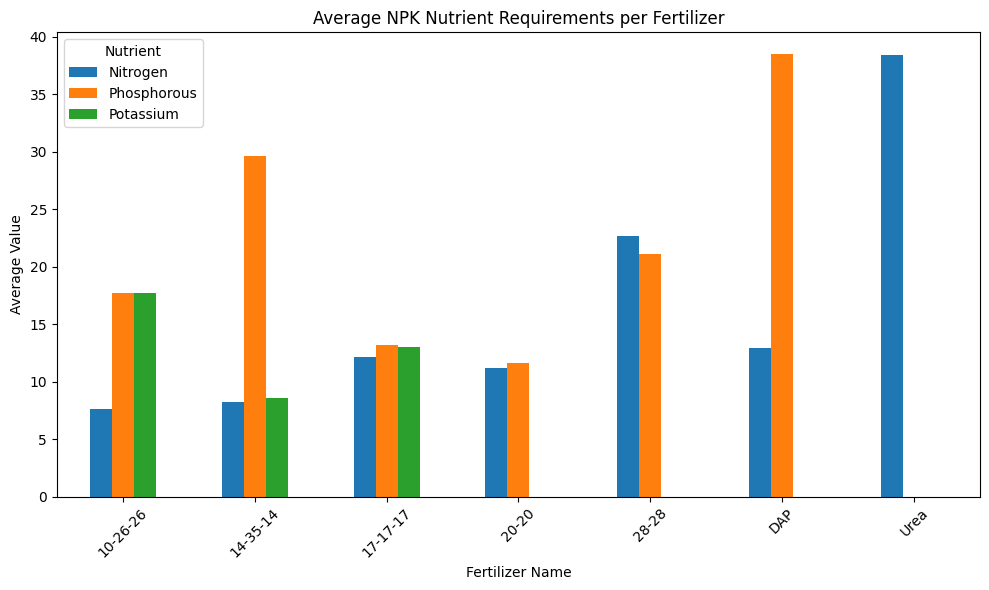

In [7]:
avg_npk_per_fert = df.groupby('Fertilizer Name')[['Nitrogen', 'Phosphorous', 'Potassium']].mean()

avg_npk_per_fert.plot(kind='bar', figsize=(10, 6))
plt.title("Average NPK Nutrient Requirements per Fertilizer")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()


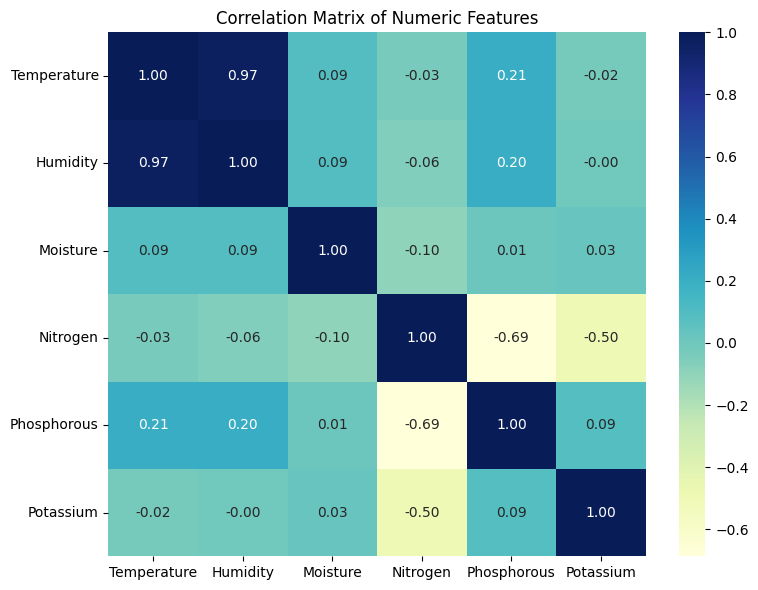

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = ['Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

# Fit and transform each column
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['Crop Type'] = le_crop.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = le_fert.fit_transform(df['Fertilizer Name'])

# Create dictionaries to store the original labels
soil_type_mapping = dict(zip(le_soil.transform(le_soil.classes_), le_soil.classes_))
crop_type_mapping = dict(zip(le_crop.transform(le_crop.classes_), le_crop.classes_))
fertilizer_name_mapping = dict(zip(le_fert.transform(le_fert.classes_), le_fert.classes_))

In [10]:
# Check number of unique labels in each categorical column
soil_type_labels = df['Soil Type'].nunique()
crop_type_labels = df['Crop Type'].nunique()
fertilizer_name_labels = df['Fertilizer Name'].nunique()

print(f"Number of unique Soil Types: {soil_type_labels}")
print(f"Number of unique Crop Types: {crop_type_labels}")
print(f"Number of unique Fertilizer Names: {fertilizer_name_labels}")


Number of unique Soil Types: 5
Number of unique Crop Types: 11
Number of unique Fertilizer Names: 7


In [11]:
df

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


In [12]:
# Step 4: Split the data
X = df.drop("Fertilizer Name", axis=1)  # Features
y = df["Fertilizer Name"]               # Target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)


In [14]:
# Step 5: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make predictions on test data
y_pred = model.predict(X_test)

In [16]:
# Step 6: Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 97.14 %


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       0.67      1.00      0.80         2
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         8

    accuracy                           0.97        35
   macro avg       0.95      0.97      0.96        35
weighted avg       0.98      0.97      0.97        35



In [18]:
# Step 8: Save model and label encoder
# Save encoders
joblib.dump(le_soil, "le_soil.pkl")
joblib.dump(le_crop, "le_crop.pkl")
joblib.dump(le_fert, "le_fert.pkl")

# Save model
joblib.dump(model, "fertilizer_model.pkl")


['fertilizer_model.pkl']

In [19]:
# Load the saved model
model = joblib.load('fertilizer_model.pkl')

In [20]:

# User Input with Units
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
moisture = float(input("Enter Moisture (%): "))
soil_type = input("Enter Soil Type (e.g., Sandy, Loamy, Clayey, etc.): ")
crop_type = input("Enter Crop Type (e.g., Maize, Sugarcane, Wheat, etc.): ")
nitrogen = int(input("Enter Nitrogen (mg/kg): "))
potassium = int(input("Enter Potassium (mg/kg): "))
phosphorous = int(input("Enter Phosphorous (mg/kg): "))

#  Encode categorical inputs
encoded_soil = le_soil.transform([soil_type])[0]
encoded_crop = le_crop.transform([crop_type])[0]

#  Input as DataFrame
input_data = pd.DataFrame([[
    temperature,
    humidity,
    moisture,
    encoded_soil,
    encoded_crop,
    nitrogen,
    potassium,
    phosphorous
]], columns=[
    'Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
    'Nitrogen', 'Potassium', 'Phosphorous'
])

# Prediction
prediction = model.predict(input_data)
fertilizer_name = le_fert.inverse_transform(prediction)

# Output
print("\n Recommended Fertilizer:", fertilizer_name[0])


Enter Temperature (°C):  34
Enter Humidity (%):  45
Enter Moisture (%):  50
Enter Soil Type (e.g., Sandy, Loamy, Clayey, etc.):  Sandy
Enter Crop Type (e.g., Maize, Sugarcane, Wheat, etc.):  Maize
Enter Nitrogen (mg/kg):  8
Enter Potassium (mg/kg):  4
Enter Phosphorous (mg/kg):  5



 Recommended Fertilizer: 17-17-17
